### Import các thư viện

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Đọc data từ file CSV để chuẩn bị train model

In [4]:

dataset_train = pd.read_csv('hbc_train (1).csv')#,on_bad_lines='skip')
training_set = dataset_train.iloc[:, 1:2].values

### Scale khoảng giá về khoảng 0-1

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Tạo dữ liệu train với X=60 bước thời gian và y=1 bước thời gian

In [6]:
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Tạo model LSTM để train model

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train model và lưu file model

In [8]:
# Neu ton tai file model thi load
if path.exists("mymodel.h5"):
     regressor.load_weights("mymodel.h5")
else:
    # Con khong thi train
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel.h5")

### Load Data để test model

In [9]:
# Load du lieu tu 1/1/2019 - 2/10/2019
dataset_test = pd.read_csv('hbc_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Tiến hành dự đoán với model đã train

In [10]:
# Tien hanh du doan
dataset_total = pd.concat((dataset_train['CLOSE'], dataset_test['CLOSE']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [11]:
X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

25/25 [==============================] - 2s 23ms/step


### Vẽ biểu đồ giá thực và giá dự đoán của Hoà Bình Construction

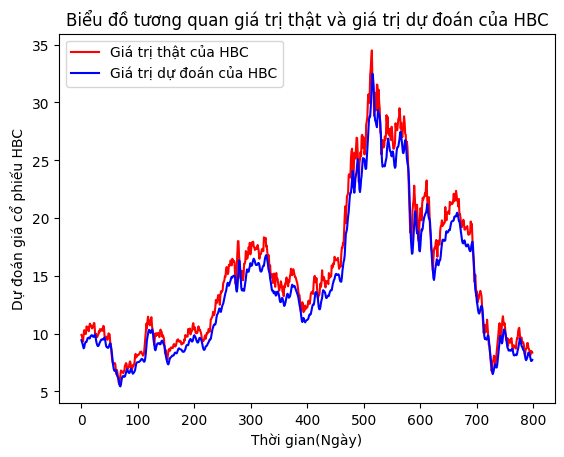

In [12]:
# Ve bieu do gia that va gia du doan
plt.plot(real_stock_price, color = 'red', label = 'Giá trị thật của HBC')
plt.plot(predicted_stock_price, color = 'blue', label = 'Giá trị dự đoán của HBC')
plt.title('Biểu đồ tương quan giá trị thật và giá trị dự đoán của HBC')
plt.xlabel('Thời gian(Ngày)')
plt.ylabel('Dự đoán giá cổ phiếu HBC')
plt.legend()
plt.show()

### Tiến hành dự đoán các ngày tiếp theo

In [13]:
dataset_test = dataset_test['CLOSE'][len(dataset_test)-60:len(dataset_test)].to_numpy()
dataset_test = np.array(dataset_test)

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


i = 0
while i<28:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    print('Stock price ' + str(i+3) + '/2/2023 of HBC : ', predicted_stock_price[0][0])
    i = i +1

1/1 [==============================] - 0s 35ms/step
Stock price 3/2/2023 of HBC :  7.7600036
1/1 [==============================] - 0s 30ms/step
Stock price 4/2/2023 of HBC :  7.5786586
1/1 [==============================] - 0s 28ms/step
Stock price 5/2/2023 of HBC :  7.311656
1/1 [==============================] - 0s 31ms/step
Stock price 6/2/2023 of HBC :  7.0329742
1/1 [==============================] - 0s 26ms/step
Stock price 7/2/2023 of HBC :  6.763356
1/1 [==============================] - 0s 26ms/step
Stock price 8/2/2023 of HBC :  6.5075502
1/1 [==============================] - 0s 25ms/step
Stock price 9/2/2023 of HBC :  6.2670283
1/1 [==============================] - 0s 25ms/step
Stock price 10/2/2023 of HBC :  6.042201
1/1 [==============================] - 0s 26ms/step
Stock price 11/2/2023 of HBC :  5.832722
1/1 [==============================] - 0s 27ms/step
Stock price 12/2/2023 of HBC :  5.6377983
1/1 [==============================] - 0s 24ms/step
Stock price 13/2/20